In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../data/EV_data_date_fixed.csv")
df.head()

,Unnamed: 0,interval_1,interval_2,interval_3,interval_4,interval_5,interval_6,interval_7,interval_8,interval_9,...,interval_44,interval_45,interval_46,interval_47,interval_48,id,label,day_of_week_num,day_of_month,month
0,0,0.0625,0.0500,0.0687,0.0750,0.0687,0.0500,0.0625,0.0687,0.0687,...,0.0562,0.0562,0.0687,0.0687,0.0625,1,1,0,1,3
1,1,0.0625,0.0500,0.0687,0.0625,0.0625,0.0562,0.0562,0.0625,0.0687,...,0.0625,0.0625,0.0562,0.0625,0.0625,1,1,1,2,3
2,2,0.0625,0.0687,0.0500,0.0562,0.0687,0.0625,0.0625,0.0625,0.0500,...,0.0687,0.0687,0.0625,0.0562,0.0562,1,1,2,3,3
3,3,0.0625,0.0625,0.0687,0.0500,0.0562,0.0625,0.0625,0.0625,0.0562,...,0.0625,0.0562,0.0625,0.0625,0.0687,1,1,3,4,3
4,4,0.0625,0.0625,0.0500,0.0625,0.0687,0.0625,0.0687,0.0562,0.0500,...,0.0625,0.0625,0.0625,0.0562,0.0500,1,1,4,5,3


In [3]:
df.drop(df.columns[0],inplace=True,axis=1)

In [25]:

def detect_outliers(data):
    outliers = []
    threshold =4
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [14]:
df.columns

Index(['interval_1', 'interval_2', 'interval_3', 'interval_4', 'interval_5',
       'interval_6', 'interval_7', 'interval_8', 'interval_9', 'interval_10',
       'interval_11', 'interval_12', 'interval_13', 'interval_14',
       'interval_15', 'interval_16', 'interval_17', 'interval_18',
       'interval_19', 'interval_20', 'interval_21', 'interval_22',
       'interval_23', 'interval_24', 'interval_25', 'interval_26',
       'interval_27', 'interval_28', 'interval_29', 'interval_30',
       'interval_31', 'interval_32', 'interval_33', 'interval_34',
       'interval_35', 'interval_36', 'interval_37', 'interval_38',
       'interval_39', 'interval_40', 'interval_41', 'interval_42',
       'interval_43', 'interval_44', 'interval_45', 'interval_46',
       'interval_47', 'interval_48', 'id', 'label', 'day_of_week_num',
       'day_of_month', 'month'],
      dtype='object')

<Axes: ylabel='interval_40'>

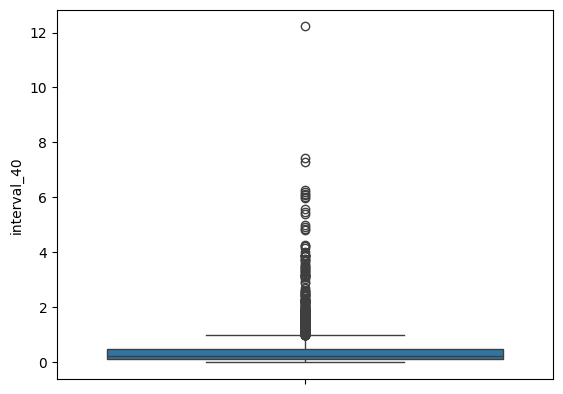

In [20]:
sns.boxplot(df['interval_40'])

In [21]:
df['row_avg'] = df[df.columns[0:48]].mean(axis=1)
df['row_avg'].head()

0    0.113123
1    0.106356
2    0.121331
3    0.118210
4    0.124852
Name: row_avg, dtype: float64

<Axes: ylabel='row_avg'>

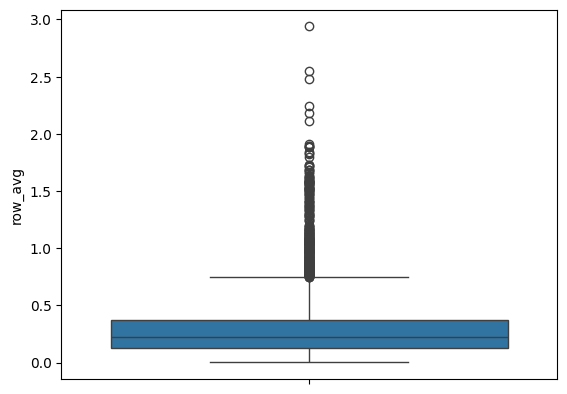

In [22]:
sns.boxplot(df['row_avg'])

In [26]:
outliers1=(detect_outliers(df['row_avg']))
len(outliers1)

54